## Group No - 112

## Group Member Names:
1. Puneeth L
2. LENKALA MIDHUN REDDY
3. JEBIN K KOSHY
4. RITESH KUMAR

# 1. Import the required libraries

In [51]:
##---------Type the code below this line------------------##
# Import all the necessary files!

import numpy as np
import scipy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
#Deep learning libs
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras.models import Sequential
from keras.regularizers import l2


from os import getcwd
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [52]:
##---------Type the code below this line------------------##

cifar10 = tf.keras.datasets.cifar10
dataset = cifar10.load_data()
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



# 
1. The data set contains approx 170 Mb
2. it contains image data of  32x32 pixel array of RGB (red, green, blue) values and lables of airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks
3.classifing image data to predict what is the image of.
4. below is the classification of the count


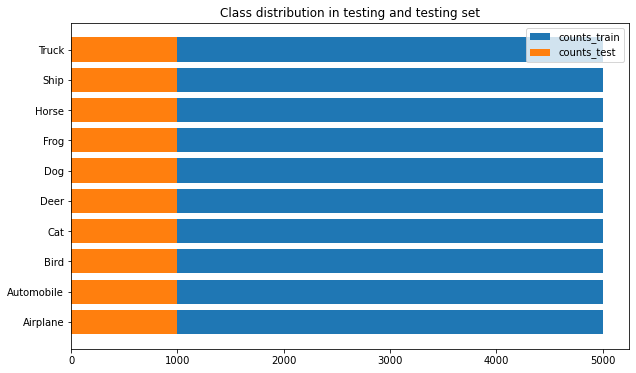

In [53]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# Increase figure size
plt.figure(figsize=(10, 6)) 
classes, counts_train = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts_train)
plt.title('Class distribution in training and testing set')

classes, counts_test = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts_test)
plt.title('Class distribution in testing and testing set')
# Add legends
plt.legend(['counts_train','counts_test'])

plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [54]:
##---------Type the code below this line------------------##

# There are 10 image classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## 3.3 Split the data into training set and testing set

In [55]:
##---------Type the code below this line------------------##

# helper code to load train and test dataset and apply one hot encoding
def load_dataset():
    cifar10 = tf.keras.datasets.cifar10
	# data set load
    (trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

X_train, y_train, X_test, y_test = load_dataset();


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [56]:


# check for missing values in x_train and X_test
print('Missing values in X_train is',np.isnan(X_train).any())
print('Missing values in X_test is ',np.isnan(X_test).any())


Missing values in X_train is False
Missing values in X_test is  False


In [57]:
##---------Type the answer below this line------------------##
batch_size = 200  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 20
data_augmentation = False

#helper code for converting pixels to normalized form
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# prepare pixel data
X_train, X_test = prep_pixels(X_train, X_test)

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [58]:
##---------Type the code below this line------------------##

# defining a vannila model
def define_4_1():
	# create model
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(3000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

  # define model
model4_1 = define_4_1()

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



# 

Input Layer:
Input shape: (32, 32, 3)
No trainable parameters in this layer since it is just the input data.

Flatten Layer:
Output shape: (3072,)
No trainable parameters in this layer. It reshapes the input from a 3D shape (32, 32, 3) to a 1D shape (3072,).

Dense Layer 1:
Number of units: 3000
Activation: ReLU
Trainable parameters: (3072 + 1) * 3000 = 9219000
3072 represents the number of input units from the previous layer (Flatten layer), and 1 represents the bias term.

Dense Layer 2:
Number of units: 1000
Activation: ReLU
Trainable parameters: (3000 + 1) * 1000 = 3001000
3000 represents the number of input units from the previous layer (Dense Layer 1), and 1 represents the bias term.

Dense Layer 3 (Output Layer):
Number of units: 10
Activation: Sigmoid
Trainable parameters: (1000 + 1) * 10 = 10010
1000 represents the number of input units from the previous layer (Dense Layer 2), and 1 represents the bias term.
The total number of trainable parameters in this model is the sum of the trainable parameters in each layer:

Total Trainable Parameters = 9219000 + 3001000 + 10010 = 12,229,010


# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [59]:
##---------Type the code below this line------------------##

#compile is done in reusable code

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [60]:
##---------Type the code below this line------------------##
# fit model
history4_1 = model4_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
250/250 [==============================] - 31s 120ms/step - loss: 1.8331 - accuracy: 0.3489 - val_loss: 1.6825 - val_accuracy: 0.4056
Epoch 2/20
250/250 [==============================] - 30s 122ms/step - loss: 1.6370 - accuracy: 0.4244 - val_loss: 1.5782 - val_accuracy: 0.4429
Epoch 3/20
250/250 [==============================] - 33s 131ms/step - loss: 1.5577 - accuracy: 0.4537 - val_loss: 1.5703 - val_accuracy: 0.4378
Epoch 4/20
250/250 [==============================] - 32s 130ms/step - loss: 1.4940 - accuracy: 0.4754 - val_loss: 1.4966 - val_accuracy: 0.4722
Epoch 5/20
250/250 [==============================] - 32s 129ms/step - loss: 1.4477 - accuracy: 0.4935 - val_loss: 1.4688 - val_accuracy: 0.4783
Epoch 6/20
250/250 [==============================] - 33s 132ms/step - loss: 1.4121 - accuracy: 0.5036 - val_loss: 1.4270 - val_accuracy: 0.4923
Epoch 7/20
250/250 [==============================] - 34s 138ms/step - loss: 1.3700 - accuracy: 0.5212 - val_loss: 1.4212 - val_ac

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


# 
Optimizer (Stochastic Gradient Descent - SGD):
The SGD optimizer is chosen with a learning rate of 0.01 and a momentum of 0.8. 

Here's the justification for using an optimizer:

-SGD is a popular optimization algorithm used in deep learning models. It updates the model's weights based on the gradients computed from a small subset (mini-batch) of the training data.

-The learning rate of 0.001 controls the step size of weight updates. It determines how quickly the model learns from the gradients. A smaller learning rate can help prevent overshooting the optimal solution, while a larger learning rate can accelerate convergence but might risk overshooting.

-The momentum of 0.9 introduces an acceleration effect by incorporating a fraction of the previous weight update. This can help the optimizer overcome local minima and speed up convergence.

# 6. Test the model - 0.5 marks


In [61]:
##---------Type the code below this line------------------##


# Predict the values from the validation dataset
Y_pred = model4_1.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_pred_classes[:5]

Y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 9s 28ms/step


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


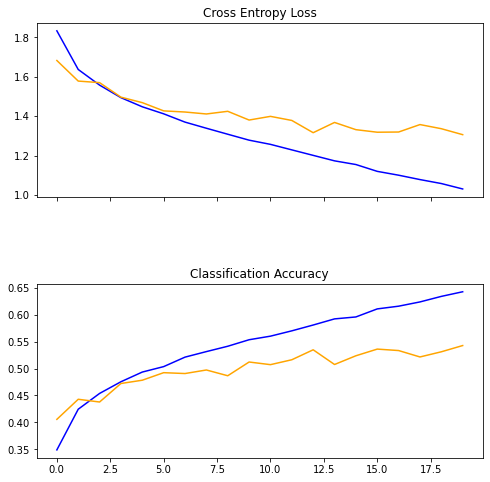

Testing Accuracy: 54.27%
Testing Loss: 1.3063
Confusion Matrix:
[[571  27  29  36  22  17  33  15 186  64]
 [ 22 650   6  27   4  14  21  12  77 167]
 [ 75  19 320 136 121  86 146  44  33  20]
 [ 25  19  43 402  28 223 154  22  29  55]
 [ 47  13  86  83 407  62 189  55  38  20]
 [ 16  10  50 242  49 458  94  33  26  22]
 [  5  15  31  84  59  37 717  10  18  24]
 [ 28  17  47  93  76 113  49 504  24  49]
 [ 60  51   6  30  11  14  15   6 746  61]
 [ 18 138   4  48   4  20  15  21  80 652]]


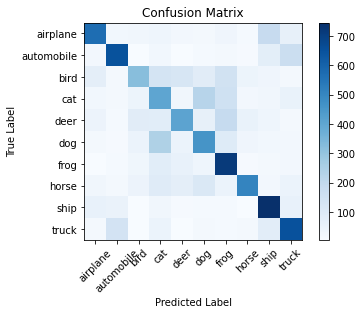

In [76]:
##---------Type the code below this line------------------##

# helper code for plotting diagnostic learning curves for model 4_1
def summarize_diagnostics(history4_1):
  fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)  
  fig.subplots_adjust(hspace=0.5)
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history4_1.history['accuracy'], color='blue', label='Training Accuracy')
  plt.plot(history4_1.history['val_accuracy'], color='orange', label='Validation Accuracy')
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history4_1.history['loss'], color='blue', label='Training Loss')
  plt.plot(history4_1.history['val_loss'], color='orange', label='Validation Loss')
   
  plt.show()
  plt.close()

# learning curves
summarize_diagnostics(history4_1)

# evaluate model
test_loss, test_accuracy = model4_1.evaluate(X_test, y_test, verbose=0)
# Print the testing accuracy and loss
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing Loss: {:.4f}".format(test_loss))

from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add label names to the x-axis and y-axis
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.show()

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [63]:
##---------Type the code below this line------------------##

# by decreasing one layer on the vannilla model

def define_8_1():
	# create model
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    #model.add(Dense(3000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

  # define model
model8_1 = define_8_1()


# fit model
history8_1 = model8_1.fit(X_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
250/250 [==============================] - 14s 48ms/step - loss: 1.8742 - accuracy: 0.3338 - val_loss: 1.7330 - val_accuracy: 0.3856
Epoch 2/20
250/250 [==============================] - 8s 33ms/step - loss: 1.6916 - accuracy: 0.4096 - val_loss: 1.6555 - val_accuracy: 0.4197
Epoch 3/20
250/250 [==============================] - 8s 32ms/step - loss: 1.6174 - accuracy: 0.4363 - val_loss: 1.6290 - val_accuracy: 0.4241
Epoch 4/20
250/250 [==============================] - 8s 31ms/step - loss: 1.5654 - accuracy: 0.4552 - val_loss: 1.5904 - val_accuracy: 0.4334
Epoch 5/20
250/250 [==============================] - 10s 38ms/step - loss: 1.5198 - accuracy: 0.4705 - val_loss: 1.5342 - val_accuracy: 0.4679
Epoch 6/20
250/250 [==============================] - 9s 34ms/step - loss: 1.4867 - accuracy: 0.4823 - val_loss: 1.5485 - val_accuracy: 0.4508
Epoch 7/20
250/250 [==============================] - 8s 32ms/step - loss: 1.4541 - accuracy: 0.4951 - val_loss: 1.4953 - val_accuracy: 0.47

In [64]:

# by increasing one layer on the vannilla model

def define_8_2():
	# create model
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(3000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

  # define model
model8_2 = define_8_2()


# fit model
history8_2 = model8_2.fit(X_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
250/250 [==============================] - 35s 139ms/step - loss: 1.8401 - accuracy: 0.3427 - val_loss: 1.6776 - val_accuracy: 0.4055
Epoch 2/20
250/250 [==============================] - 33s 133ms/step - loss: 1.6376 - accuracy: 0.4209 - val_loss: 1.5942 - val_accuracy: 0.4383
Epoch 3/20
250/250 [==============================] - 35s 139ms/step - loss: 1.5507 - accuracy: 0.4526 - val_loss: 1.5029 - val_accuracy: 0.4695
Epoch 4/20
250/250 [==============================] - 39s 155ms/step - loss: 1.4897 - accuracy: 0.4731 - val_loss: 1.4752 - val_accuracy: 0.4787
Epoch 5/20
250/250 [==============================] - 36s 145ms/step - loss: 1.4433 - accuracy: 0.4911 - val_loss: 1.4354 - val_accuracy: 0.4914
Epoch 6/20
250/250 [==============================] - 38s 151ms/step - loss: 1.3971 - accuracy: 0.5055 - val_loss: 1.4355 - val_accuracy: 0.4852
Epoch 7/20
250/250 [==============================] - 40s 158ms/step - loss: 1.3560 - accuracy: 0.5209 - val_loss: 1.4142 - val_ac

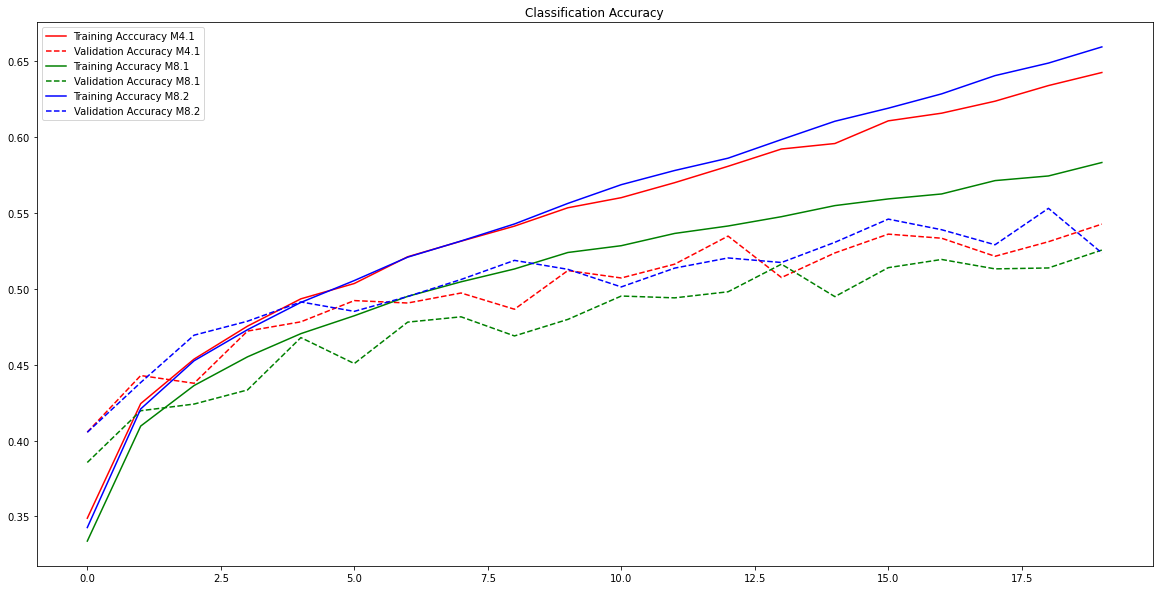

In [65]:
#Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)

# helper code for plotting diagnostic learning curves for model 4_1
def summarize_diagnostics(history4_1,history8_1,history8_2):

  # plot accuracy
  plt.figure(figsize=(20, 10)) 
  plt.title('Classification Accuracy')
  plt.plot(history4_1.history['accuracy'], 'r-', label='Training Acccuracy M4.1')
  plt.plot(history4_1.history['val_accuracy'], 'r--', label='Validation Accuracy M4.1')

  plt.plot(history8_1.history['accuracy'], 'g-', label='Training Accuracy M8.1')
  plt.plot(history8_1.history['val_accuracy'], 'g--', label='Validation Accuracy M8.1')

  plt.plot(history8_2.history['accuracy'], 'b-', label='Training Accuracy M8.2')
  plt.plot(history8_2.history['val_accuracy'], 'b--', label='Validation Accuracy M8.2')
  plt.legend()
    
  plt.show()
  plt.close()

# learning curves
summarize_diagnostics(history4_1,history8_1,history8_2)

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [66]:
##---------Type the code below this line------------------##

# Vannila model with drop out 0.25
def define_9_1():
	# create model
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(3000, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

  # define model
model9_1 = define_9_1()


# fit model
history9_1 = model9_1.fit(X_train, y_train,epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
250/250 [==============================] - 38s 147ms/step - loss: 1.8691 - accuracy: 0.3317 - val_loss: 1.7101 - val_accuracy: 0.4002
Epoch 2/20
250/250 [==============================] - 36s 144ms/step - loss: 1.6756 - accuracy: 0.4096 - val_loss: 1.6202 - val_accuracy: 0.4265
Epoch 3/20
250/250 [==============================] - 36s 143ms/step - loss: 1.5918 - accuracy: 0.4394 - val_loss: 1.5803 - val_accuracy: 0.4457
Epoch 4/20
250/250 [==============================] - 36s 143ms/step - loss: 1.5408 - accuracy: 0.4568 - val_loss: 1.5255 - val_accuracy: 0.4641
Epoch 5/20
250/250 [==============================] - 40s 161ms/step - loss: 1.4927 - accuracy: 0.4746 - val_loss: 1.4916 - val_accuracy: 0.4709
Epoch 6/20
250/250 [==============================] - 41s 164ms/step - loss: 1.4565 - accuracy: 0.4921 - val_loss: 1.5024 - val_accuracy: 0.4773
Epoch 7/20
250/250 [==============================] - 40s 158ms/step - loss: 1.4262 - accuracy: 0.4975 - val_loss: 1.4299 - val_ac

In [67]:
# Vannila model with drop out 0.25 with  L2 regulariser with factor 1e−04
def define_9_2():
	# create model
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(3000, activation='relu', kernel_regularizer=l2(1e-04)))
    model.add(Dropout(0.2))
    model.add(Dense(1000, activation='relu', kernel_regularizer=l2(1e-04)))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

  # define model
model9_2 = define_9_2()


# fit model
history9_2 = model9_2.fit(X_train, y_train,epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
250/250 [==============================] - 42s 156ms/step - loss: 2.3139 - accuracy: 0.3360 - val_loss: 2.1474 - val_accuracy: 0.4104
Epoch 2/20
250/250 [==============================] - 38s 153ms/step - loss: 2.1221 - accuracy: 0.4124 - val_loss: 2.0438 - val_accuracy: 0.4335
Epoch 3/20
250/250 [==============================] - 37s 149ms/step - loss: 2.0411 - accuracy: 0.4397 - val_loss: 2.0140 - val_accuracy: 0.4440
Epoch 4/20
250/250 [==============================] - 37s 148ms/step - loss: 1.9890 - accuracy: 0.4573 - val_loss: 1.9548 - val_accuracy: 0.4657
Epoch 5/20
250/250 [==============================] - 37s 148ms/step - loss: 1.9438 - accuracy: 0.4728 - val_loss: 1.9419 - val_accuracy: 0.4641
Epoch 6/20
250/250 [==============================] - 37s 149ms/step - loss: 1.9064 - accuracy: 0.4846 - val_loss: 1.9224 - val_accuracy: 0.4861
Epoch 7/20
250/250 [==============================] - 39s 158ms/step - loss: 1.8661 - accuracy: 0.4995 - val_loss: 1.9036 - val_ac

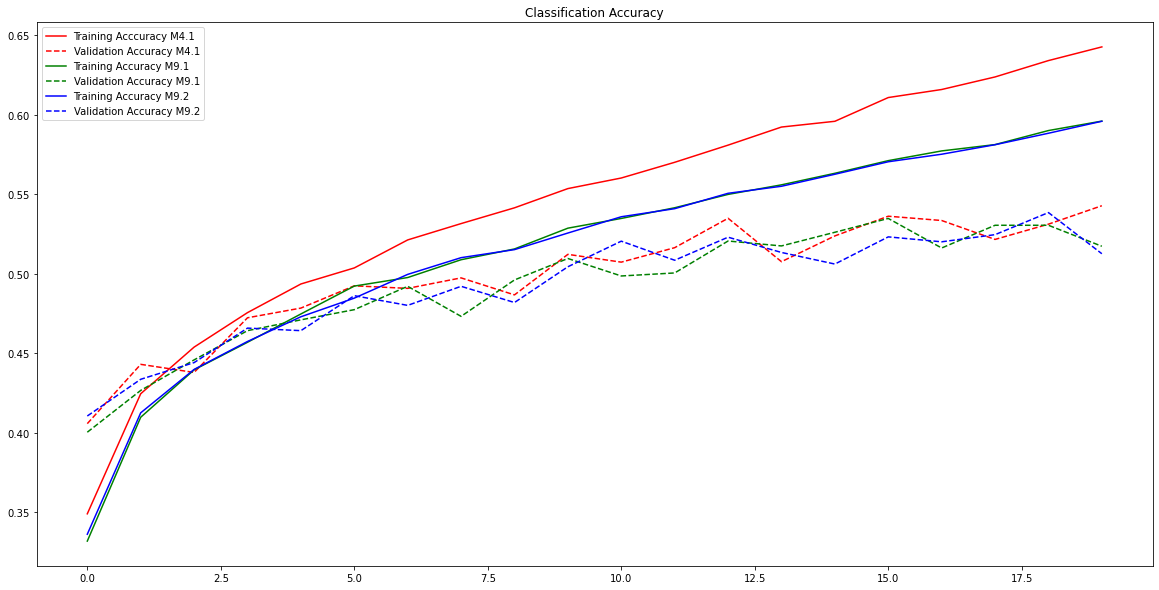

In [68]:
#Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)

# helper code for plotting diagnostic learning curves for model 4_1
def summarize_diagnostics(history4_1,history9_1,history9_2):

  # plot accuracy
  plt.figure(figsize=(20, 10)) 
  plt.title('Classification Accuracy')
  plt.plot(history4_1.history['accuracy'], 'r-', label='Training Acccuracy M4.1')
  plt.plot(history4_1.history['val_accuracy'], 'r--', label='Validation Accuracy M4.1')

  plt.plot(history9_1.history['accuracy'], 'g-', label='Training Accuracy M9.1')
  plt.plot(history9_1.history['val_accuracy'], 'g--', label='Validation Accuracy M9.1')

  plt.plot(history9_2.history['accuracy'], 'b-', label='Training Accuracy M9.2')
  plt.plot(history9_2.history['val_accuracy'], 'b--', label='Validation Accuracy M9.2')
  plt.legend()
    
  plt.show()
  plt.close()

# learning curves
summarize_diagnostics(history4_1,history9_1,history9_2)


# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [69]:
##---------Type the code below this line------------------##

def define_10_1():
	# create model
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(3000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    learning_rate = 0.001
    rho = 0.9
    epsilon = 1e-08

# Create the RMSProp optimizer
    optimizer = RMSprop(learning_rate=learning_rate, rho=rho, epsilon=epsilon)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

  # define model
model10_1 = define_10_1()

# fit model
history10_1 = model10_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
250/250 [==============================] - 50s 199ms/step - loss: 2.6984 - accuracy: 0.2368 - val_loss: 1.8444 - val_accuracy: 0.3540
Epoch 2/20
250/250 [==============================] - 48s 194ms/step - loss: 1.8335 - accuracy: 0.3419 - val_loss: 1.7208 - val_accuracy: 0.3839
Epoch 3/20
250/250 [==============================] - 48s 193ms/step - loss: 1.7316 - accuracy: 0.3796 - val_loss: 1.6303 - val_accuracy: 0.4255
Epoch 4/20
250/250 [==============================] - 49s 194ms/step - loss: 1.6644 - accuracy: 0.4074 - val_loss: 1.6760 - val_accuracy: 0.3967
Epoch 5/20
250/250 [==============================] - 48s 193ms/step - loss: 1.6068 - accuracy: 0.4254 - val_loss: 1.6254 - val_accuracy: 0.4228
Epoch 6/20
250/250 [==============================] - 49s 194ms/step - loss: 1.5578 - accuracy: 0.4434 - val_loss: 1.6122 - val_accuracy: 0.4258
Epoch 7/20
250/250 [==============================] - 49s 194ms/step - loss: 1.5190 - accuracy: 0.4563 - val_loss: 1.5392 - val_ac

In [70]:


def define_10_2():
	# create model
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(3000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    # Compile model
    # Define the hyperparameters for Adam optimizer
    learning_rate = 0.001
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 1e-08

    # Create the Adam optimizer
    optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

  # define model
model10_2 = define_10_2()

# fit model
history10_2 = model10_2.fit(X_train, y_train,epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
250/250 [==============================] - 57s 223ms/step - loss: 2.1949 - accuracy: 0.2985 - val_loss: 1.7446 - val_accuracy: 0.3746
Epoch 2/20
250/250 [==============================] - 55s 221ms/step - loss: 1.6842 - accuracy: 0.3962 - val_loss: 1.6179 - val_accuracy: 0.4264
Epoch 3/20
250/250 [==============================] - 55s 222ms/step - loss: 1.5957 - accuracy: 0.4308 - val_loss: 1.5434 - val_accuracy: 0.4515
Epoch 4/20
250/250 [==============================] - 55s 219ms/step - loss: 1.5351 - accuracy: 0.4548 - val_loss: 1.5049 - val_accuracy: 0.4629
Epoch 5/20
250/250 [==============================] - 55s 219ms/step - loss: 1.4803 - accuracy: 0.4748 - val_loss: 1.4775 - val_accuracy: 0.4770
Epoch 6/20
250/250 [==============================] - 54s 218ms/step - loss: 1.4557 - accuracy: 0.4827 - val_loss: 1.4583 - val_accuracy: 0.4856
Epoch 7/20
250/250 [==============================] - 55s 219ms/step - loss: 1.4015 - accuracy: 0.4993 - val_loss: 1.4602 - val_ac

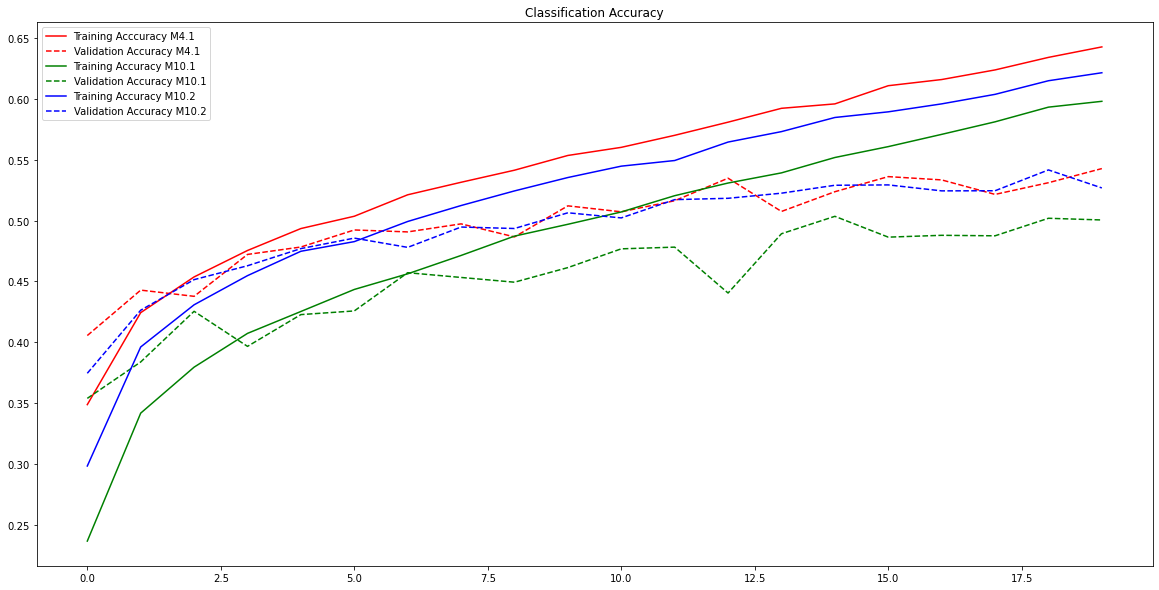

In [71]:
#Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)

# helper code for plotting diagnostic learning curves for model 4_1
def summarize_diagnostics(history4_1,history10_1,history10_2):

  # plot accuracy
  plt.figure(figsize=(20, 10)) 
  plt.title('Classification Accuracy')
  plt.plot(history4_1.history['accuracy'], 'r-', label='Training Acccuracy M4.1')
  plt.plot(history4_1.history['val_accuracy'], 'r--', label='Validation Accuracy M4.1')

  plt.plot(history10_1.history['accuracy'], 'g-', label='Training Accuracy M10.1')
  plt.plot(history10_1.history['val_accuracy'], 'g--', label='Validation Accuracy M10.1')

  plt.plot(history10_2.history['accuracy'], 'b-', label='Training Accuracy M10.2')
  plt.plot(history10_2.history['val_accuracy'], 'b--', label='Validation Accuracy M10.2')
  plt.legend()
    
  plt.show()
  plt.close()

# learning curves
summarize_diagnostics(history4_1,history10_1,history10_2)


# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [72]:
##---------Type the code below this line------------------##

1. Model 8.2 has the highest accuraccy which has the model configuration of optimizar SDG with learning_rate=0.01, momentum=0.8.
2. Model 8.1 has the lowest accuraccy which has only one hidden layer and has similar configuration with Model 8.2
3. This infers that having right set of layers will result in higher accuracy.
4. There was no significant improvement in adding additional layer.
5. There is increase in the accuraccy when number of epecho is increased but it gets flatenned after a point.



### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck